In [109]:
#import libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mp
from collections import Counter


In [4]:
titanic_train_data = pd.read_csv('datasets/train.csv')
titanic_test_data = pd.read_csv('datasets/test.csv')

In [29]:
#see description of all columns, interest specifically on NaN values
titanic_train_data.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Turkula, Mrs. (Hedwig)",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


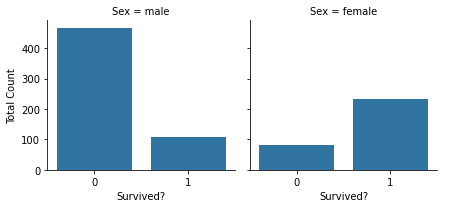

In [205]:

sb.FacetGrid(titanic_train_data, col = 'Sex').map(
    sb.countplot, 'Survived', order = None).set_axis_labels(
        'Survived?', 'Total Count').add_legend()


<AxesSubplot:>

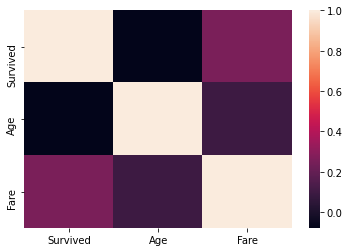

In [83]:
sb.heatmap(titanic_train_data[['Survived','Age','Fare','Sex']].corr())

In [108]:
titanic_train_data.loc[titanic_train_data['Survived'] ==0].groupby('Sex').count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,81,81,81,81,64,81,81,81,81,6,81
male,468,468,468,468,360,468,468,468,468,62,468


In [64]:
titanic_train_data[titanic_train_data.isnull().any(1)]
titanic_train_data[['Cabin','PassengerId']].groupby(['Cabin']).describe()
titanic_train_data[(titanic_train_data['Survived']==0) & (~titanic_train_data['Cabin'].isnull()) ]



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
...,...,...,...,...,...,...,...,...,...,...,...,...
789,790,0,1,"Guggenheim, Mr. Benjamin",male,46.0,0,0,PC 17593,79.2000,B82 B84,C
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
